In [196]:
pacman::p_load(tidyverse, reshape2, scales, ggthemes, plotly, ggpubr, ggalluvial)
source('ggplot_theme_Publication-2.R')

In [50]:
df <- read.csv('MB2_TOPUP_MOBILE.csv', sep = "|")
df <- df %>% mutate_at(vars(contains('DATE')), ~(as.Date(., '%m/%d/%Y')))
cam_date <- as.Date('14/9/2022', '%d/%m/%Y')
mod_date <- as.Date('1/10/2022', '%d/%m/%Y')
mod_date_ <- as.Date('1/11/2022', '%d/%m/%Y')
before <- df %>% filter(TRAN_DATE < cam_date)
after <- df %>% filter(TRAN_DATE >= cam_date)
model1_ls_10 <- read.csv('VIB20_CLIENT_FILE_FOR_TOPUP_28SEP.csv')
model2_ls_11 <- read.csv('VIB20_TOPUPv2_POTENTIAL_2022_11.csv')
model1_ls_11 <- read.csv('VIB20_CLIENT_FILE_FOR_TOPUP_22_11_02.csv')
model1_ls_10_label0 <- read.csv('CLIENT_FILE_FOR_TOPUP_102022_LABEL0.csv')
model1_ls_11_label0 <- read.csv('CLIENT_FILE_FOR_TOPUP_112022_LABEL0.csv')

In [62]:
client_nos <- c(model1_ls_10$CLIENT_NO, model1_ls_11$CLIENT_NO)
non_client_nos <- na.omit(c(as.numeric(model1_ls_10_label0$CLIENT_NO), as.numeric(model1_ls_11_label0$CLIENT_NO)))
both <- c(client_nos, non_client_nos)

Warning message in na.omit(c(as.numeric(model1_ls_10_label0$CLIENT_NO), as.numeric(model1_ls_11_label0$CLIENT_NO))):
"NAs introduced by coercion"
Warning message in na.omit(c(as.numeric(model1_ls_10_label0$CLIENT_NO), as.numeric(model1_ls_11_label0$CLIENT_NO))):
"NAs introduced by coercion"


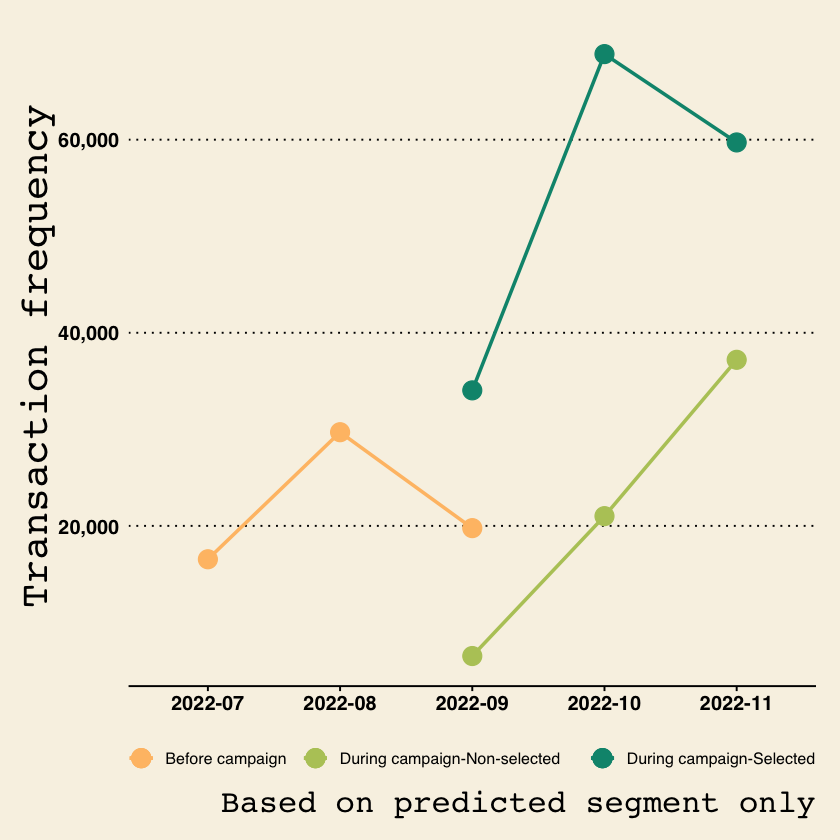

In [81]:
tmp <- before %>% filter(CLIENT_NO %in% both) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(TF = n())
tmp_ <- after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(TF = n())
tmp__ <- after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(TF = n())

p1 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = TF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = TF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = TF, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = TF, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = TF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = TF, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Transaction frequency', caption = 'Based on predicted segment only') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
p1


`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



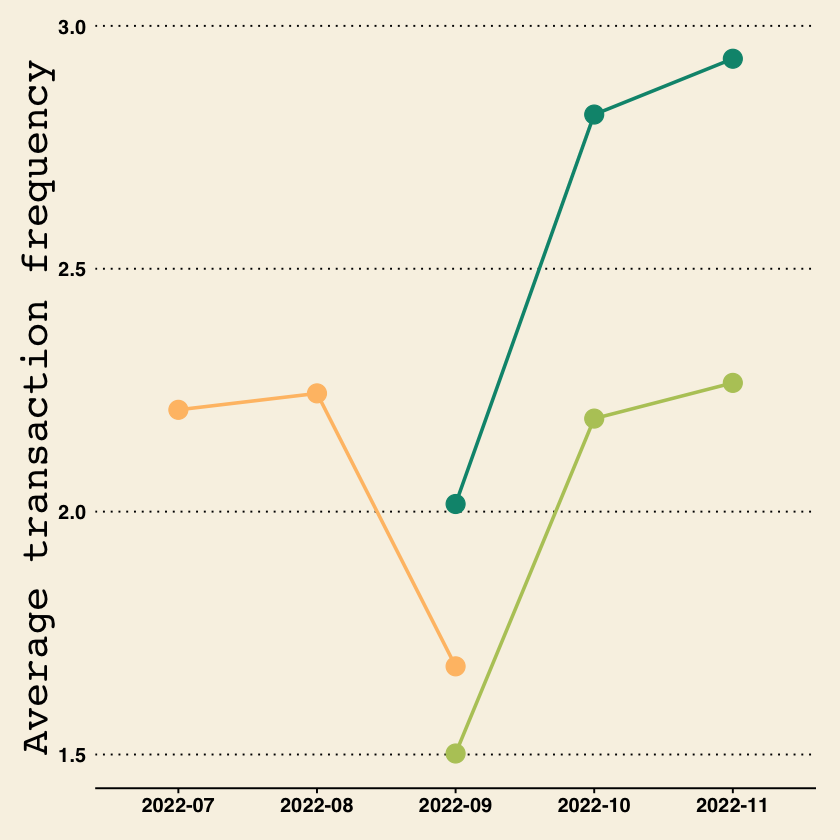

In [124]:
tmp <-before %>% filter(CLIENT_NO %in% both) %>% 
      mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% 
      mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% 
      mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
p2 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average transaction frequency') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none', axis.title.y= element_text())
p2 

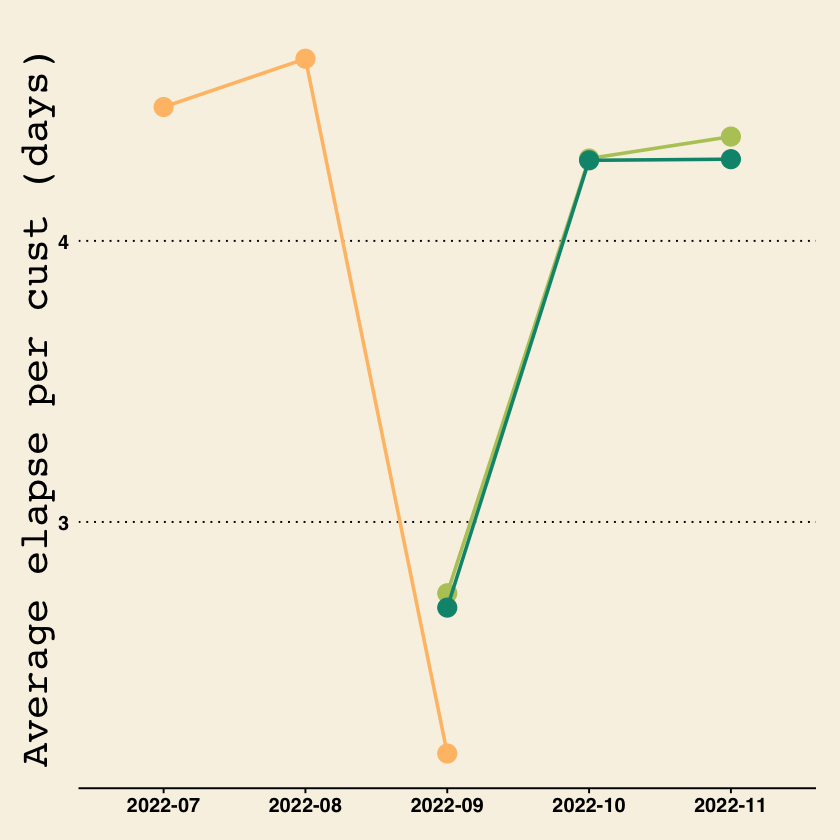

In [149]:
tmp <- before %>% filter(CLIENT_NO %in% both) %>% 
            mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
            group_by(TIME, CLIENT_NO) %>%
            arrange(TRAN_DATE, .by_group = TRUE) %>% 
            mutate(LAG_TRAN_DATE = lag(TRAN_DATE)) %>% 
            mutate(DIFF = as.numeric(TRAN_DATE - LAG_TRAN_DATE)) %>% 
            group_by(TIME) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))

tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            arrange(TRAN_DATE, .by_group = TRUE) %>% 
            mutate(LAG_TRAN_DATE = lag(TRAN_DATE)) %>% 
            mutate(DIFF = as.numeric(TRAN_DATE - LAG_TRAN_DATE)) %>% 
            group_by(TIME) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))

tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            arrange(TRAN_DATE, .by_group = TRUE) %>% 
            mutate(LAG_TRAN_DATE = lag(TRAN_DATE)) %>% 
            mutate(DIFF = as.numeric(TRAN_DATE - LAG_TRAN_DATE)) %>% 
            group_by(TIME) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))

p3 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = DIFF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = DIFF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = DIFF, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = DIFF, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = DIFF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = DIFF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average elapse (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text())
p3 

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



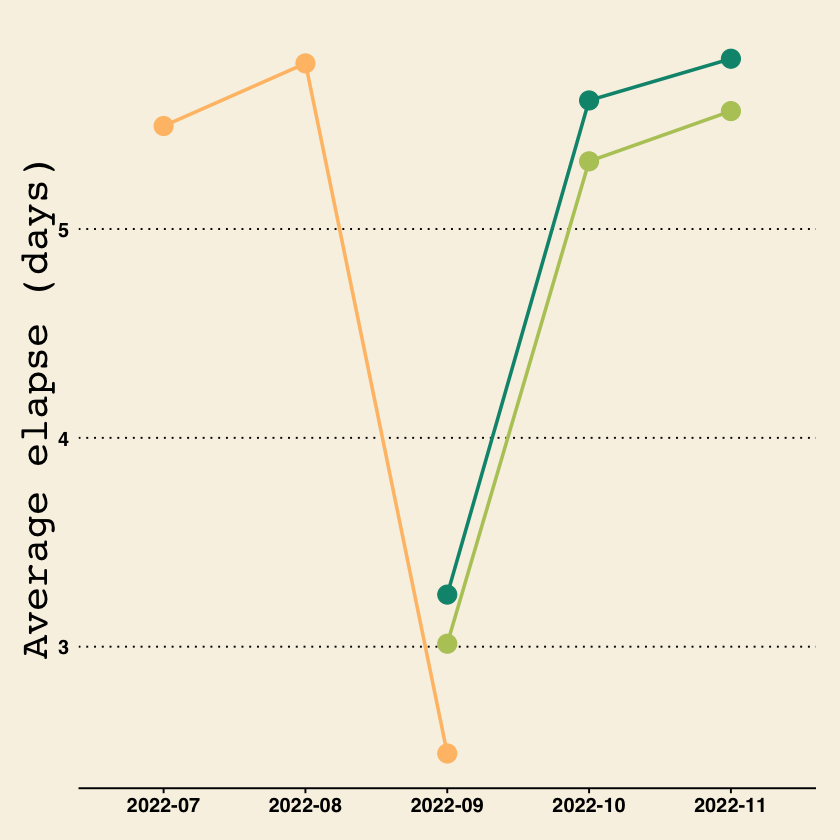

In [125]:
tmp_func <- function(vec) {
    if (length(vec) > 1){
        return(as.numeric(mean(diff(vec[order(vec)]))))
    } else {
        return(NA)
    }
}
tmp <-before %>% filter(CLIENT_NO %in% both) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        # group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        # arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif, na.rm = TRUE))

tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        # group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        # arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif, na.rm = TRUE))
tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        # group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        # arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif, na.rm = TRUE))
p3 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ADif, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ADif, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average elapse per cust (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text())
p3 

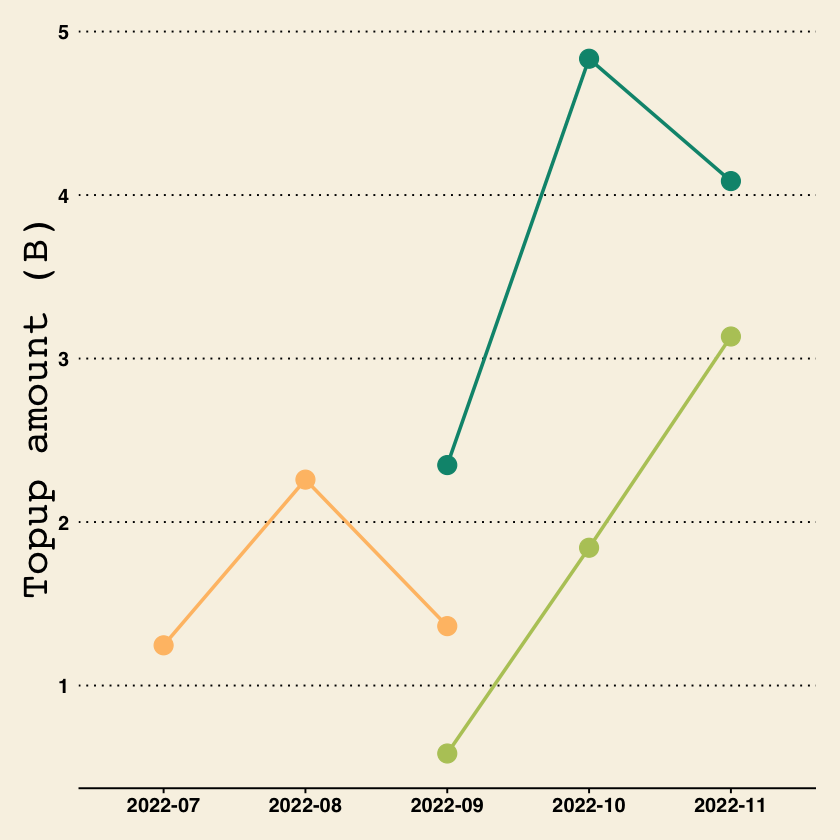

In [150]:
tmp <-before %>% filter(CLIENT_NO %in% both) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)

tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)
tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)

ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Topup amount (B)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text())

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



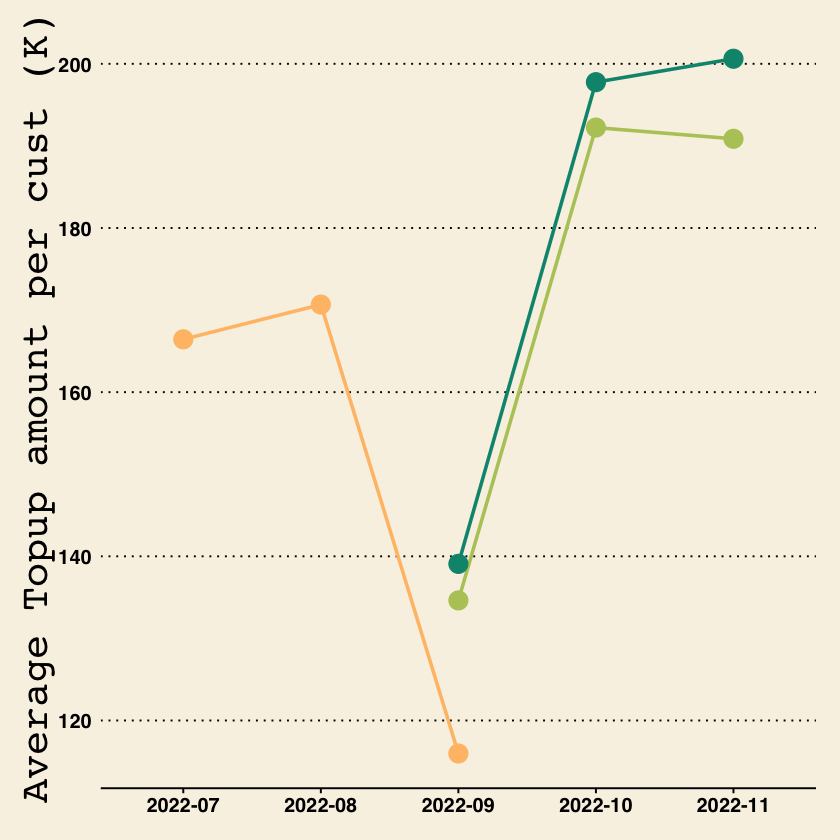

In [151]:
tmp <-before %>% filter(CLIENT_NO %in% both) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
# tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))

ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average Topup amount per cust (K)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text())

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

Joining, by = "CLIENT_NO"

Joining, by = "CLIENT_NO"

Joining, by = "CLIENT_NO"



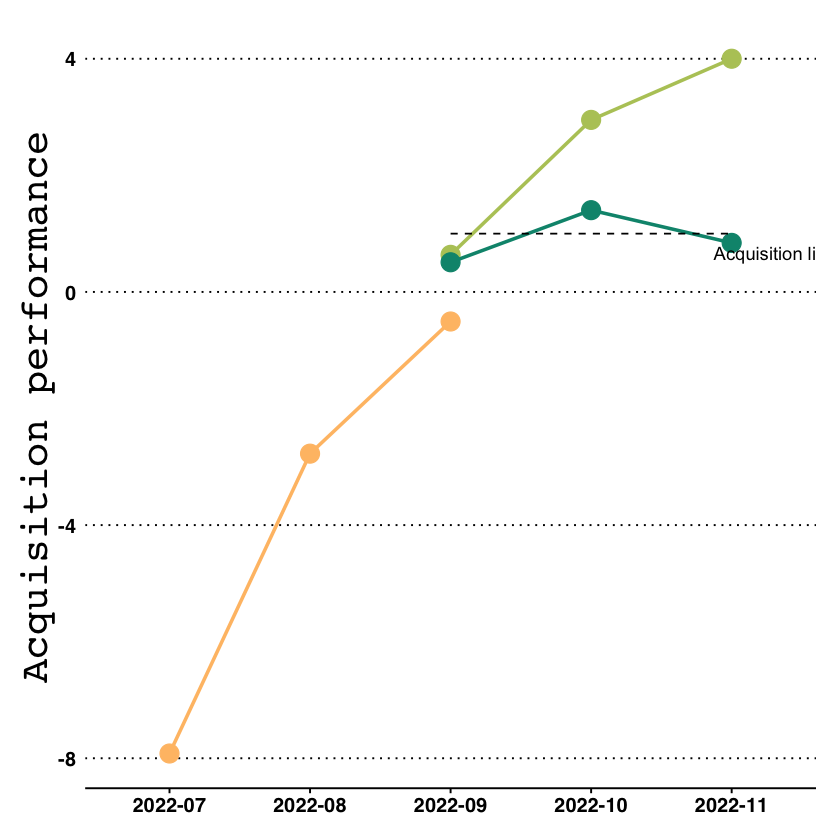

In [165]:
tmp <-before %>% filter(CLIENT_NO %in% both) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>% 
                summarise(first = min(TRAN_DATE))
tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>% 
                summarise(first = min(TRAN_DATE))
tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>% 
                summarise(first = min(TRAN_DATE))

tmp <- left_join(tmp, df %>% select(CLIENT_NO, IB_REGISTERED_DATE2) %>% unique())
tmp <- tmp %>% ungroup() %>% mutate(Ratio = as.numeric(first - cam_date) / as.numeric(first - IB_REGISTERED_DATE2))
tmp <- tmp %>% filter(!is.na(tmp),!is.infinite(Ratio)) %>% group_by(TIME) %>% summarise(Ratio = mean(Ratio, na.rm = TRUE))


tmp_ <- left_join(tmp_, df %>% select(CLIENT_NO, IB_REGISTERED_DATE2) %>% unique())
tmp_ <- tmp_ %>% ungroup() %>% mutate(Ratio = as.numeric(first - cam_date) / as.numeric(first - IB_REGISTERED_DATE2))
tmp_ <- tmp_ %>% filter(!is.na(tmp_),!is.infinite(Ratio)) %>% group_by(TIME) %>% summarise(Ratio = mean(Ratio, na.rm = TRUE))

tmp__ <- left_join(tmp__, df %>% select(CLIENT_NO, IB_REGISTERED_DATE2) %>% unique())
tmp__ <- tmp__ %>% ungroup() %>% mutate(Ratio = as.numeric(first - cam_date) / as.numeric(first - IB_REGISTERED_DATE2))
tmp__ <- tmp__ %>% filter(!is.na(tmp__),!is.infinite(Ratio)) %>% group_by(TIME) %>% summarise(Ratio = mean(Ratio, na.rm = TRUE))


ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = Ratio, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = Ratio, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Selected'), size = 5) +
geom_segment(aes(x = '2022-09', xend = '2022-11',y=1, yend = 1, color = 'Line'), linetype = 'dashed') +
geom_text(aes(x = '2022-10', y = 1, label = 'Acquisition line', color = 'Line'), hjust = -1, vjust = 2) +
labs(x = 'Month', y = 'Acquisition performance') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C','black')) + 
theme(legend.position = 'none',axis.title.y= element_text(), panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

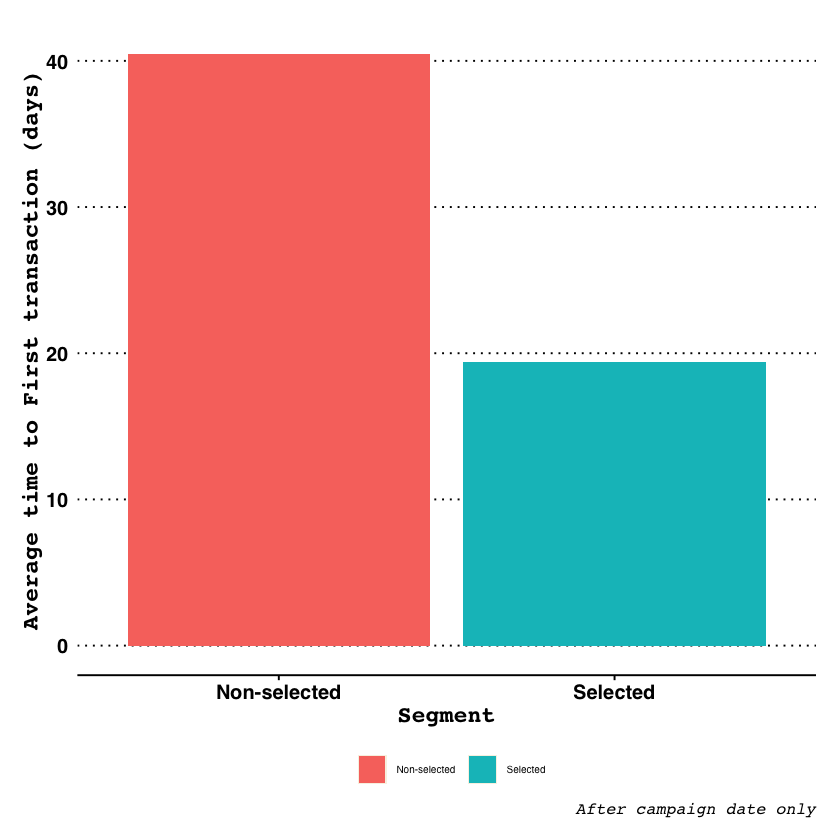

In [176]:
tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE)) %>% 
        mutate(diff = as.numeric(first - cam_date))

tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE)) %>% 
        mutate(diff = as.numeric(first - cam_date))

data.frame(x = c('Selected', 'Non-selected'), y = c(mean(tmp_$diff, na.rm = TRUE), mean(tmp__$diff, na.rm = TRUE))) %>%
ggplot() + 
geom_bar(aes(x = x, y = y, fill = x), width = 0.5, stat = 'identity', position = "dodge") +
labs(x = 'Segment', y = 'Average time to First transaction (days)', caption = 'Since campaign date') +
theme_wsj() +
scale_color_manual(values = c('#01937C','#B6C867')) + 
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))
# theme(legend.position = 'none',axis.title.y= element_text(), panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

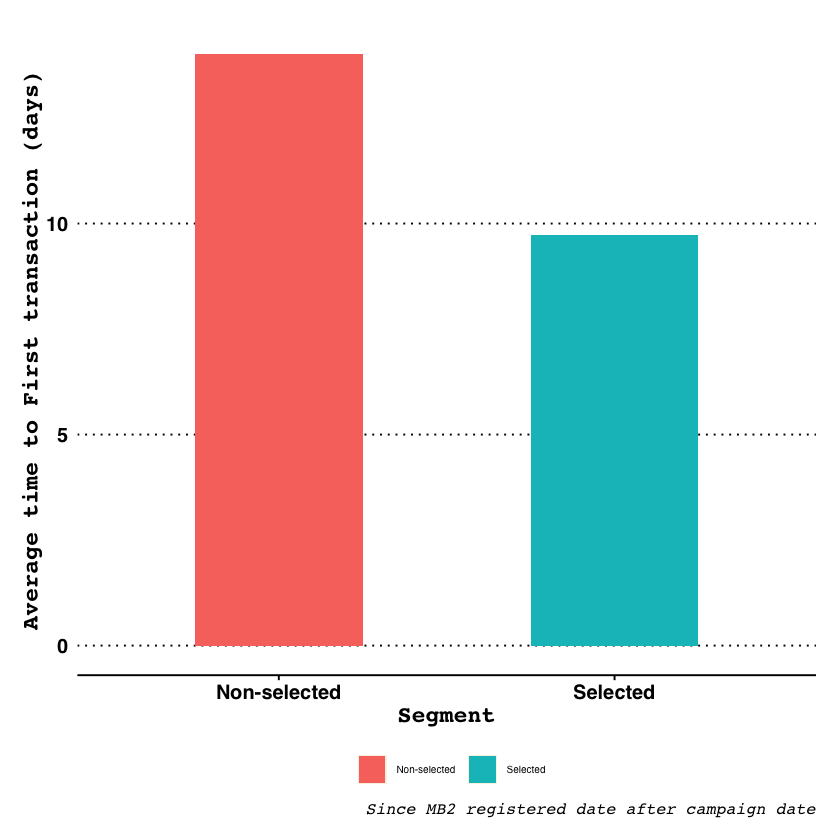

In [191]:
tmp_ <- after %>% filter(CLIENT_NO %in% client_nos) %>% filter(IB_REGISTERED_DATE2 >= cam_date) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE), IB_REGISTERED_DATE2 = mean(IB_REGISTERED_DATE2)) %>% 
        ungroup() %>%
        mutate(diff = as.numeric(first - IB_REGISTERED_DATE2))

tmp__ <- after %>% filter(CLIENT_NO %in% non_client_nos) %>% filter(IB_REGISTERED_DATE2 >= cam_date) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE), IB_REGISTERED_DATE2 = mean(IB_REGISTERED_DATE2)) %>% 
        ungroup() %>%
        mutate(diff = as.numeric(first - IB_REGISTERED_DATE2))

data.frame(x = c('Selected', 'Non-selected'), y = c(mean(tmp_$diff, na.rm = TRUE), mean(tmp__$diff, na.rm = TRUE))) %>%
ggplot() + 
geom_bar(aes(x = x, y = y, fill = x), width = 0.5,  stat = 'identity', position = "dodge") +
labs(x = 'Segment', y = 'Average time to First transaction (days)', caption = 'Since MB2 registered date after campaign date') +
theme_wsj() +
scale_color_manual(values = c('#01937C','#B6C867')) + 
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))
# theme(legend.position = 'none',axis.title.y= element_text(), panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

In [187]:
summary(tmp_)

   CLIENT_NO           first            IB_REGISTERED_DATE2        ar         
 Min.   :  21966   Min.   :2022-09-14   Min.   :2022-09-14   Min.   :-10.000  
 1st Qu.:2148882   1st Qu.:2022-09-27   1st Qu.:2022-09-19   1st Qu.:  1.500  
 Median :3041301   Median :2022-10-11   Median :2022-09-27   Median :  3.154  
 Mean   :2887633   Mean   :2022-10-10   Mean   :2022-09-30   Mean   :    Inf  
 3rd Qu.:3993910   3rd Qu.:2022-10-22   3rd Qu.:2022-10-12   3rd Qu.: 10.500  
 Max.   :4092639   Max.   :2022-11-30   Max.   :2022-11-28   Max.   :    Inf  
                                                             NA's   :30       

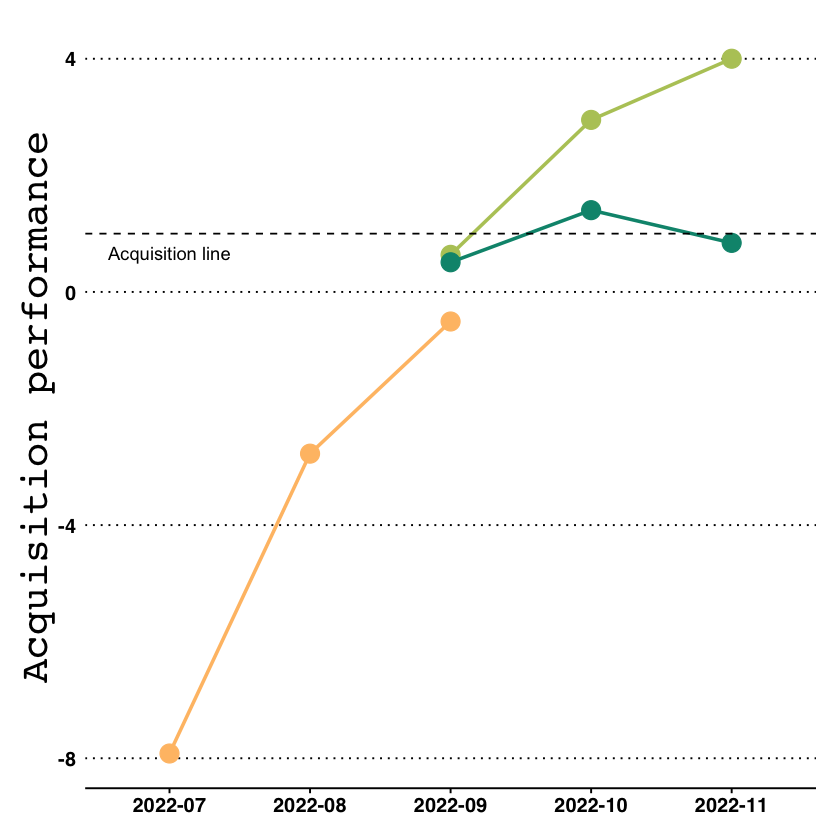

In [164]:
ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = Ratio, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = Ratio, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = Ratio, group = 1, color = 'During campaign-Selected'), size = 5) +
geom_hline(aes(yintercept = 1, color = "Line"), linetype = 'dashed') +
# geom_segment(aes(x = '2022-09', xend = '2022-11',y=1, yend = 1, color = 'Line'), linetype = 'dashed') +
geom_text(aes(x = '2022-07', y = 1, label = 'Acquisition line', color = 'Line'), vjust = 2) +
labs(x = 'Month', y = 'Acquisition performance') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C','black')) + 
theme(legend.position = 'none',axis.title.y= element_text(), panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'TIME'. You can override using the `.groups` argument.



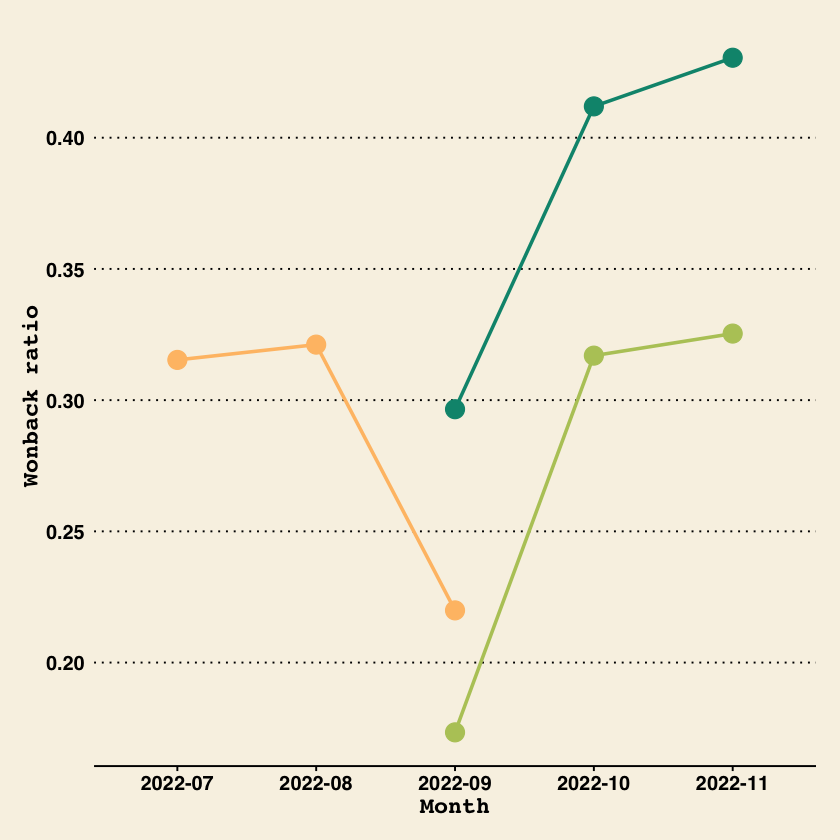

In [159]:
tmp <-before %>% filter(CLIENT_NO %in% both) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            summarise(Total = n(), Subtotal = n()-1) %>%
            mutate(WR = Subtotal / Total) %>% group_by(TIME) %>% summarise(WR = mean(WR))
tmp_ <-after %>% filter(CLIENT_NO %in% client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            summarise(Total = n(), Subtotal = n()-1) %>%
            mutate(WR = Subtotal / Total) %>% group_by(TIME) %>% summarise(WR = mean(WR))
tmp__ <-after %>% filter(CLIENT_NO %in% non_client_nos) %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            summarise(Total = n(), Subtotal = n()-1) %>%
            mutate(WR = Subtotal / Total) %>% group_by(TIME) %>% summarise(WR = mean(WR))

ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = WR, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = WR, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = WR, group = 1, color = 'During campaign-Non-selected'), size = 1) +
geom_point(data = tmp__ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = WR, group = 1, color = 'During campaign-Non-selected'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = WR, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = WR, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Wonback ratio') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C','black')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"))


Joining, by = "CLIENT_NO"

Joining, by = "CLIENT_NO"

Joining, by = "CLIENT_NO"

Warning message:
"Predicate functions must be wrapped in `where()`.

  # Bad
  data %>% select(is.numeric)

  # Good
  data %>% select(where(is.numeric))

i Please update your code.
This message is displayed once per session."
Using Month as id variables



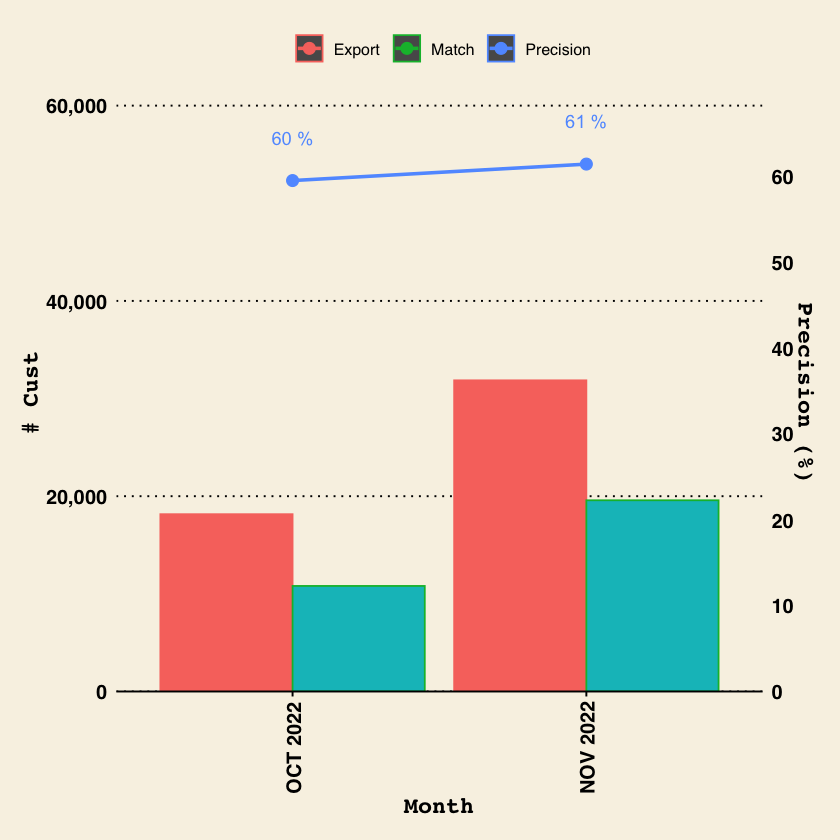

In [158]:
performance <- data.frame(Model = NA,
                            Month = NA,
                          Export = NA,
                          Match = NA)
performance <- rbind(performance, data.frame(Model = 'Model 1', 
                                            Month = 'OCT 2022',
                                            Export = nrow(model1_ls_10),
                                            Match = nrow(inner_join(model1_ls_10, after %>% filter(TRAN_DATE >= mod_date), on = 'CLIENT_NO') %>% select(CLIENT_NO) %>% unique())))
performance <- rbind(performance, data.frame(Model = 'Model 1', 
                                            Month = 'NOV 2022',
                                            Export = nrow(model1_ls_11),
                                            Match = nrow(inner_join(model1_ls_11, after %>% filter(TRAN_DATE >= mod_date_), on = 'CLIENT_NO') %>% select(CLIENT_NO) %>% unique())))
                                            
performance <- rbind(performance, data.frame(Model = 'Model 2', 
                                            Month = 'NOV 2022',
                                            Export = nrow(model2_ls_11),
                                            Match = nrow(inner_join(model2_ls_11, after %>% filter(TRAN_DATE >= mod_date_), on = 'CLIENT_NO') %>% select(CLIENT_NO) %>% unique())))
performance <- na.omit(performance)
performance <- performance %>% mutate(Precision = Match / Export)

y_max <- max(performance %>% select(is.numeric))
scaleRight <- 100 / y_max
ggplot(melt(performance %>% filter(Model == 'Model 1') %>% select(-Precision, -Model) %>% mutate(Month = factor(Month, levels = c('OCT 2022', 'NOV 2022')))), aes(x = Month)) +
    geom_bar(aes(y = value, fill = variable, color = variable),  stat = 'identity', position = "dodge") +
    geom_point(data = performance %>% filter(Model == 'Model 1'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision'), size = 3) +
    geom_line(data = performance %>% filter(Model == 'Model 1'), aes( y = Precision * 100 / scaleRight, group = 1, color = 'Precision'), size = 1) +
    geom_text(data = performance %>% filter(Model == 'Model 1'), aes(y = (Precision * 100 + 5) / scaleRight , label = paste(round(Precision,2)*100, '%'), color = 'Precision'),show.legend=F) +
    # scale_color_manual(values = c('black')) +
    scale_y_continuous(labels = comma, expand = expansion(mult = c(0,.05)),
                    sec.axis = sec_axis(~.*scaleRight, name = "Precision (%)",
                                        breaks=seq(0,100,10))) +
    # theme_classic() +
    # scale_fill_Publication() + 
    # scale_colour_Publication()+
    theme_wsj() +
    guides(color = guide_legend(nrow = 1),fill="none") +
    labs( y="# Cust", x="Month") +
    theme(#axis.text.x = element_text(angle=90, vjust=0.6),
        axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"),
        legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent", colour = NA),
      legend.key = element_rect(fill = "transparent"), 
      legend.spacing = unit(-1, "lines"),
      legend.title=element_blank(), plot.title = element_text(face="bold", size = 20))

In [192]:
head(after)

,CLIENT_NO,IB_REGISTERED_DATE2,TRAN_DATE,TRAN_AMOUNT
,<int>,<date>,<date>,<int>
1,190011,2012-11-21,2022-10-28,485000
2,190011,2012-11-21,2022-11-10,291000
3,327079,2022-08-22,2022-10-19,19400
4,327079,2022-08-22,2022-09-27,200000
5,327079,2022-08-22,2022-09-23,30000
6,327079,2022-08-22,2022-11-05,97000


In [194]:
after2 <- after %>% filter(CLIENT_NO %in% client_nos) %>% filter(IB_REGISTERED_DATE2 >= cam_date) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE), IB_REGISTERED_DATE2 = mean(IB_REGISTERED_DATE2)) %>% 
        ungroup() %>%
        mutate(State1 = case_when(IB_REGISTERED_DATE2 == cam_date ~ 'Open = Campaign ', IB_REGISTERED_DATE2 > cam_date ~ 'Open > Campaign', TRUE ~ 'Open < Campaign'),
                State2 = case_when(first > IB_REGISTERED_DATE2 ~ 'First > Open', first == IB_REGISTERED_DATE2 ~ 'Fist = Open', TRUE ~ 'First < Open')) %>%
        group_by(State1, State2) %>%
        summarise(Freq = n())
head(after2)

`summarise()` has grouped output by 'State1'. You can override using the `.groups` argument.



State1,State2,Freq
<chr>,<chr>,<int>
Open = Campaign,First > Open,329
Open = Campaign,Fist = Open,30
Open > Campaign,First < Open,13
Open > Campaign,First > Open,5204
Open > Campaign,Fist = Open,927


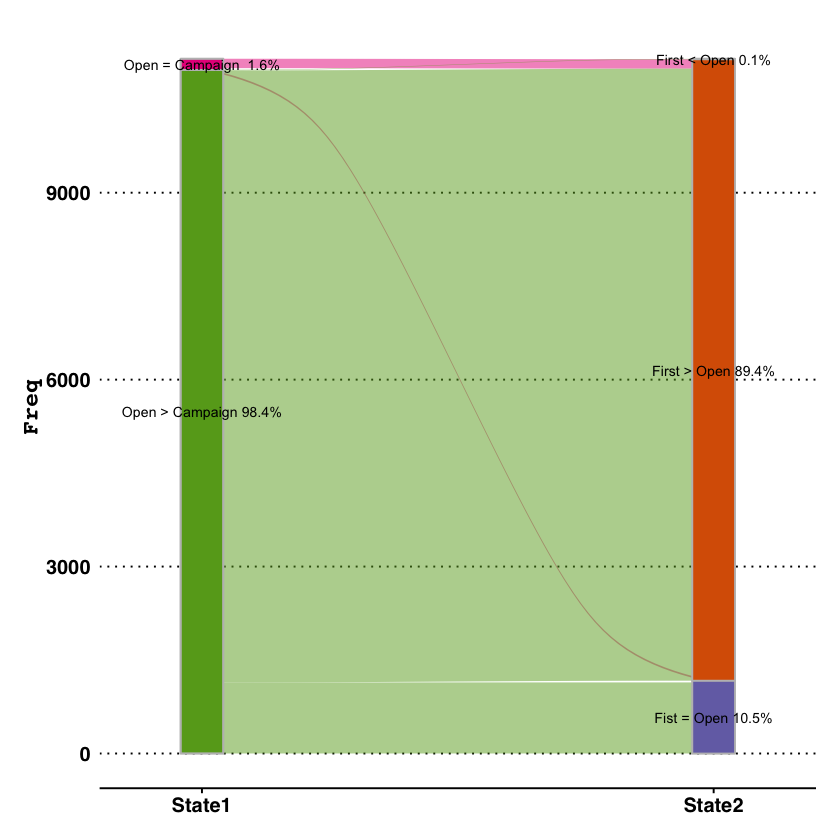

In [200]:
ggplot(after2, aes(y = Freq, axis1 = State1, axis2 = State2)) +
  geom_alluvium(aes(fill = State1), width = 0) +
  geom_stratum(width = 1/12, aes(fill = State1), color = "grey") +
  geom_stratum(width = 1/12, aes(fill = State2), color = "grey") +
  geom_text(stat = "stratum", aes(label = paste(after_stat(stratum),percent(after_stat(prop), accuracy = .1))), size = 3) +
  scale_x_discrete(limits = c("State1", "State2"), expand = c(.1, .1)) +
  scale_fill_brewer(type = "qual", palette = "Dark2") +
  labs(y = 'Count') +
  theme_wsj() +
  theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

  # theme(axis.line=element_blank(),
  #     axis.text.x=element_blank(),
  #    #  axis.text.y=element_blank(),
  #     axis.ticks=element_blank(),
  #     axis.title.x=element_blank(),
  #     axis.title.y=element_blank(),
  #     legend.position="none",
  #     panel.background=element_blank()
  #    #  panel.border=element_blank(),
  #    #  panel.grid.major=element_blank(),
  #    #  panel.grid.minor=element_blank(),
  #    #  plot.background=element_blank()
  #     )


`summarise()` has grouped output by 'State1'. You can override using the `.groups` argument.



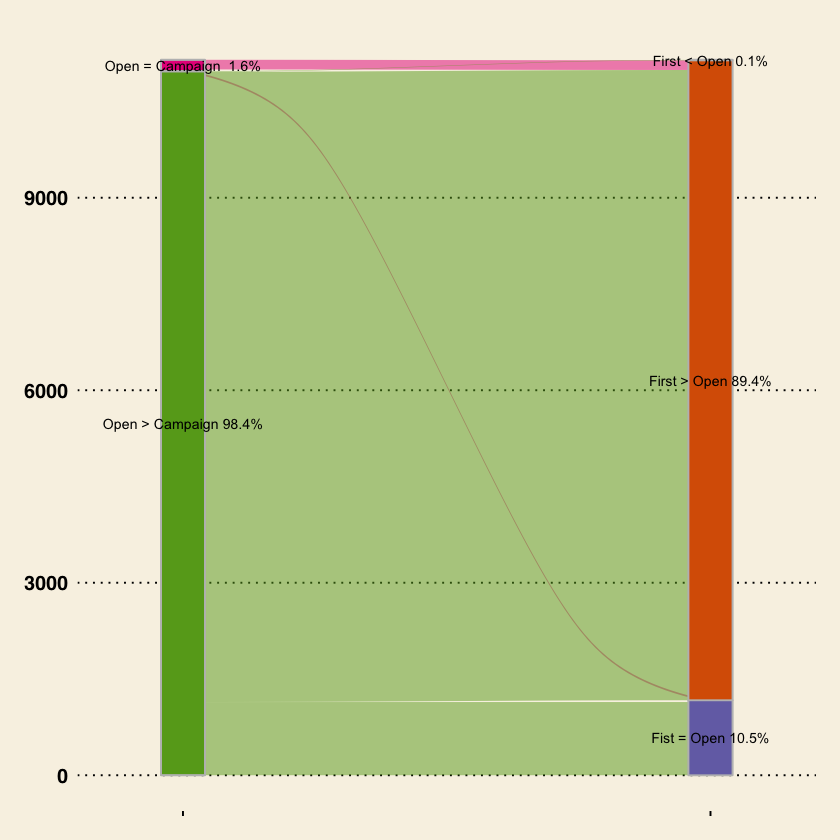

In [199]:
after2 <- after %>% filter(CLIENT_NO %in% non_client_nos) %>% filter(IB_REGISTERED_DATE2 >= cam_date) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE), IB_REGISTERED_DATE2 = mean(IB_REGISTERED_DATE2)) %>% 
        ungroup() %>%
        mutate(State1 = case_when(IB_REGISTERED_DATE2 == cam_date ~ 'Open = Campaign ', IB_REGISTERED_DATE2 > cam_date ~ 'Open > Campaign', TRUE ~ 'Open < Campaign'),
                State2 = case_when(first > IB_REGISTERED_DATE2 ~ 'First > Open', first == IB_REGISTERED_DATE2 ~ 'Fist = Open', TRUE ~ 'First < Open')) %>%
        group_by(State1, State2) %>%
        summarise(Freq = n())

ggplot(after2, aes(y = Freq, axis1 = State1, axis2 = State2)) +
  geom_alluvium(aes(fill = State1), width = 0) +
  geom_stratum(width = 1/12, aes(fill = State1), color = "grey") +
  geom_stratum(width = 1/12, aes(fill = State2), color = "grey") +
  geom_text(stat = "stratum", aes(label = paste(after_stat(stratum),percent(after_stat(prop), accuracy = .1))), size = 3) +
  scale_x_discrete(limits = c("State1", "State2"), expand = c(.1, .1)) +
  scale_fill_brewer(type = "qual", palette = "Dark2") +
  theme_wsj() +
  theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
     #  axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      legend.position="none",
      panel.background=element_blank()
     #  panel.border=element_blank(),
     #  panel.grid.major=element_blank(),
     #  panel.grid.minor=element_blank(),
     #  plot.background=element_blank()
      )


# CAMPAIGN

In [ ]:
Campaign performance {.tabset}
===================
Row
-----------------------------------------------------------------------

### Transaction frequency

```{r}
tmp <-before %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(TF = n())
tmp_ <- after %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  
                group_by(TIME) %>% 
                summarise(TF = n())

p1 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = TF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = TF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = TF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = TF, group = 1, color = 'During campaign-Selected'), size = 5) +
scale_y_continuous(labels = comma) +
labs(x = 'Month', y = 'Transaction frequency', caption = 'Based on entire data') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
# theme(legend.title = element_blank(), legend.position = 'bottom', axis.title.y= element_text())
theme(legend.title = element_blank(), legend.position = 'bottom',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      legend.text = element_text(size = 6),panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'),
      legend.background = element_rect(fill = 'white'))
p1

```

### Average transaction frequency per customer

```{r}

tmp <-before %>% 
      mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp_ <-after  %>% 
      mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = n()) %>% group_by(TIME) %>% summarise(ATF = mean(n))
p2 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average transaction frequency') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
p2 

```

Row
-----------------------------------------------------------------------

### Average elapse between consecutive transactions
```{r}
tmp <- before %>% 
            mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
            group_by(TIME, CLIENT_NO) %>%
            arrange(TRAN_DATE, .by_group = TRUE) %>% 
            mutate(LAG_TRAN_DATE = lag(TRAN_DATE)) %>% 
            mutate(DIFF = as.numeric(TRAN_DATE - LAG_TRAN_DATE)) %>% 
            group_by(TIME) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))

tmp_ <-after  %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            arrange(TRAN_DATE, .by_group = TRUE) %>% 
            mutate(LAG_TRAN_DATE = lag(TRAN_DATE)) %>% 
            mutate(DIFF = as.numeric(TRAN_DATE - LAG_TRAN_DATE)) %>% 
            group_by(TIME) %>% summarise(DIFF = mean(DIFF, na.rm = TRUE))


p3 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = DIFF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = DIFF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = DIFF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = DIFF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average elapse (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
p3 
```

### Average elapse between consecutive transactions per cust

```{r}
tmp_func <- function(vec) {
    if (length(vec) > 1){
        return(as.numeric(mean(diff(vec[order(vec)]))))
    } else {
        return(NA)
    }
}
tmp <-before %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        # group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        # arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif, na.rm = TRUE))

tmp_ <-after  %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        # group_by(TIME,CLIENT_NO, TRAN_DATE) %>% 
        # arrange(TRAN_DATE) %>% 
        group_by(TIME, CLIENT_NO) %>% 
        summarise(Dif = tmp_func(TRAN_DATE)) %>%
        group_by(TIME) %>%
        summarise(ADif = mean(Dif, na.rm = TRUE))
p4 <- ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ADif, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ADif, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ADif, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average elapse per cust (days)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
p4 
```


Row
-----------------------------------------------------------------------

### Topup Amount

```{r}
tmp <-before %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)

tmp_ <-after  %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME) %>% 
                summarise(ATF = sum(TRAN_AMOUNT)/10^9)

ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Topup amount (B)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
```


### Average Topup Amount per cust

```{r}
tmp <-before %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
tmp_ <-after  %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))
# tmp <- df %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>%  group_by(TIME , CLIENT_NO) %>% summarise(n = sum(TRAN_AMOUNT)/10^3) %>% group_by(TIME) %>% summarise(ATF = mean(n))

ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = ATF, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = ATF, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Average Topup amount per cust (K)') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))
```

Row
-----------------------------------------------------------------------

### Wonback Ratio

```{r}
tmp <-before %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            summarise(Total = n(), Subtotal = n()-1) %>%
            mutate(WR = Subtotal / Total) %>% group_by(TIME) %>% summarise(WR = mean(WR))
tmp_ <-after  %>% mutate(TIME = format(TRAN_DATE, "%Y-%m")) %>% 
        group_by(TIME, CLIENT_NO) %>%
            summarise(Total = n(), Subtotal = n()-1) %>%
            mutate(WR = Subtotal / Total) %>% group_by(TIME) %>% summarise(WR = mean(WR))

ggplot() + 
geom_line(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = WR, group = 1, color = 'Before campaign'), size = 1) +
geom_point(data = tmp %>% filter(TIME %in% c('2022-07','2022-08','2022-09')), aes(x = TIME, y = WR, group = 1, color = 'Before campaign'), size = 5) +
geom_line(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = WR, group = 1, color = 'During campaign-Selected'), size = 1) +
geom_point(data = tmp_ %>% filter(TIME %in% c('2022-09','2022-10','2022-11')), aes(x = TIME, y = WR, group = 1, color = 'During campaign-Selected'), size = 5) +
labs(x = 'Month', y = 'Wonback ratio') +
theme_wsj() +
scale_color_manual(values = c('#FFC074','#B6C867','#01937C','black')) + 
theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

```

### Acquisition performance 

```{r}
after2 <- after %>% filter(IB_REGISTERED_DATE2 >= cam_date) %>%
        group_by(CLIENT_NO) %>% 
        summarise(first = min(TRAN_DATE), IB_REGISTERED_DATE2 = mean(IB_REGISTERED_DATE2)) %>% 
        ungroup() %>%
        mutate(State1 = case_when(IB_REGISTERED_DATE2 == cam_date ~ 'Open = Campaign ', IB_REGISTERED_DATE2 > cam_date ~ 'Open > Campaign', TRUE ~ 'Open < Campaign'),
                State2 = case_when(first > IB_REGISTERED_DATE2 ~ 'First > Open', first == IB_REGISTERED_DATE2 ~ 'Fist = Open', TRUE ~ 'First < Open')) %>%
        group_by(State1, State2) %>%
        summarise(Freq = n())
ggplot(after2, aes(y = Freq, axis1 = State1, axis2 = State2)) +
  geom_alluvium(aes(fill = State1), width = 0) +
  geom_stratum(width = 1/12, aes(fill = State1), color = "grey") +
  geom_stratum(width = 1/12, aes(fill = State2), color = "grey") +
  geom_text(stat = "stratum", aes(label = paste(after_stat(stratum),percent(after_stat(prop), accuracy = .1))), size = 3) +
  scale_x_discrete(limits = c("State1", "State2"), expand = c(.1, .1)) +
  scale_fill_brewer(type = "qual", palette = "Dark2") +
  labs(y = 'Count') +
  theme_wsj() +
  theme(legend.position = 'none',axis.title.y= element_text(), axis.text=element_text(size=12),
      axis.title=element_text(size=14,face="bold"), plot.caption = element_text(size = 10, face = 'italic'),
      panel.background = element_rect(fill = 'white'), plot.background = element_rect(fill = 'white'))

```
